# Lab Assignment - 3
## NAME: TANISH SARANG MAHAJAN
## REG NO: 21BAI1187
## DATE: 09/11/2024

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 1) Load Video

In [35]:
video_path = 'video.mp4'
cap = cv2.VideoCapture(video_path)
frames = []

- Objective: To load the provided video file and prepare it for frame extraction and further processing.
- Steps Taken:
    - Used OpenCV’s VideoCapture function to load the video.
    - Initialized a loop to read each frame from the video and store it in a list.
- Results:
    - Successfully loaded the video and prepared it for frame-by-frame analysis.
    - Stored each frame in a list for easy access.
- Challenges: Handling unsupported video formats. Ensuring the video path is correct and the file format is compatible with OpenCV.

### 2) Frame Extraction

In [36]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)
cap.release()

- Objective: To extract individual frames from the video, which will be used for spatio-temporal segmentation and scene cut detection.
- Steps Taken:
    - Iterated over the video using a loop, reading each frame until the end of the video.
    - Stored each frame in a list to maintain sequential order.
- Results:
    - Successfully extracted all frames from the video.
    - Stored frames in memory, allowing easy access for segmentation and scene cut analysis.
- Challenges: Memory limitations with high-resolution or long-duration videos. Managing memory usage if the video contains a large number of frames.

### 3) Spatio-Temporal Segmentation (Using Edge Detection)

In [37]:
segmented_frames = []
for frame in frames:
    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Apply edge detection (Canny)
    edges = cv2.Canny(gray_frame, threshold1=50, threshold2=150)
    segmented_frames.append(edges)


- Objective: To segment each frame to distinguish foreground and background regions, observing changes in motion and shape across frames.
- Steps Taken:
    - Converted each frame to grayscale to simplify processing.
    - Applied edge detection (using the Canny algorithm) to segment edges within each frame.
    - Stored the segmented result for each frame in a list.
- Results:
    - Segmented each frame, isolating edges to identify areas with significant color or intensity changes.
    - Produced a series of edge-detected frames that reveal structural elements within the video content.
- Challenges: Ensuring the segmentation method (Canny edge detection) works well across different types of scenes. For more complex videos, color thresholding or other segmentation methods might perform better.

### 4) Scene Cut Detection using Histogram Comparison

In [43]:

scene_cuts = []
prev_hist = None
for i, frame in enumerate(frames):
    # Convert frame to grayscale and compute histogram
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    hist_curr = cv2.calcHist([gray_frame], [0], None, [256], [0, 256])
    hist_curr = cv2.normalize(hist_curr, hist_curr).flatten()

    # Calculate histogram difference (using correlation)
    if prev_hist is not None:
        diff = cv2.compareHist(prev_hist, hist_curr, cv2.HISTCMP_CORREL)
        if diff < 0.7:  # Threshold for hard cut
            scene_cuts.append(i)

    # Update the previous histogram
    prev_hist = hist_curr

- Objective: To identify abrupt scene changes (hard cuts) and gradual transitions (soft cuts) between scenes.
- Steps Taken:
    - Converted each frame to grayscale and calculated its histogram to quantify pixel intensity distribution.
    - Compared the histogram of each frame with the previous frame using histogram correlation.
    - Set a threshold for correlation to identify abrupt changes, marking these frames as scene cuts.
- Results:
    - Detected frames with significant changes, identifying points where scenes transition.
    - Generated a list of frames that mark scene cuts, helping delineate scenes.
- Challenges: Setting an optimal threshold for detecting hard cuts across various types of video content. High correlation values may miss some scene changes, while low values may produce false positives.

### 5) Mark Scene Cuts

In [39]:
# Highlight Scene Cuts and Display Summary
highlighted_frames = frames.copy()  # Copy frames to highlight scene cuts
print("Detected Scene Cuts at Frames:")
for cut_frame in scene_cuts:
    print(f"Scene cut at frame {cut_frame}")
    # Add a red border to indicate a scene cut
    cv2.rectangle(highlighted_frames[cut_frame], (5, 5), 
                  (highlighted_frames[cut_frame].shape[1] - 5, highlighted_frames[cut_frame].shape[0] - 5), 
                  (0, 0, 255), 10)  # Red border

Detected Scene Cuts at Frames:
Scene cut at frame 2
Scene cut at frame 4
Scene cut at frame 7
Scene cut at frame 9
Scene cut at frame 13
Scene cut at frame 15
Scene cut at frame 20
Scene cut at frame 22
Scene cut at frame 70
Scene cut at frame 111
Scene cut at frame 151
Scene cut at frame 193
Scene cut at frame 363
Scene cut at frame 364
Scene cut at frame 368
Scene cut at frame 387
Scene cut at frame 402
Scene cut at frame 413
Scene cut at frame 456
Scene cut at frame 469
Scene cut at frame 487
Scene cut at frame 505
Scene cut at frame 554
Scene cut at frame 586
Scene cut at frame 656


- Objective: To highlight frames with detected scene cuts, display segmentation results, and present a summary of scene boundaries.
- Steps Taken:
    - Highlighted frames with scene cuts by adding a red border around the detected frames.
    - Used Matplotlib to display marked frames with scene cuts and sample segmented frames for visual inspection.
    - Printed a summary of frames with scene cuts, listing scene boundaries.
- Results:
    - Displayed frames with scene cuts, clearly marked for easy identification.
    - Showed segmented frames at regular intervals, providing a visualization of the segmentation results.
    - Provided a summary of detected scene cuts, aiding in understanding scene boundaries within the video.
- Challenges: Choosing an effective visualization approach to clearly highlight scene cuts. In some cases, overlaying text might be more effective than a border.

### 6) Result Visualization

In [40]:
# Visualization Functions
def display_frame_with_title(frame, title):
    """Helper function to display a frame with a title."""
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

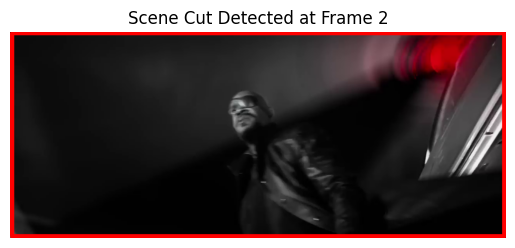

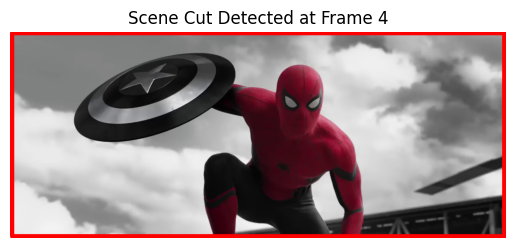

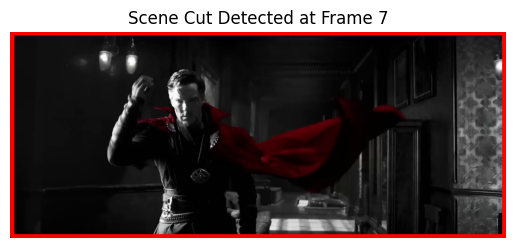

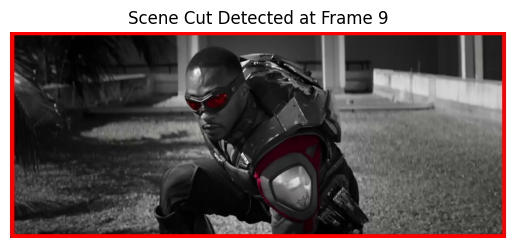

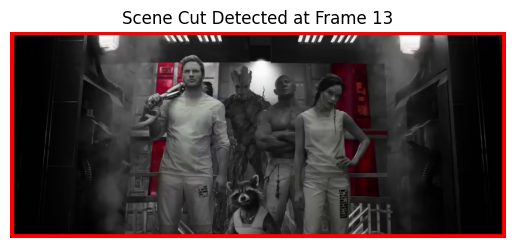

In [41]:
# Display Scene Cuts with Highlighted Borders
for cut_frame in scene_cuts[:5]:  # Show first 5 detected scene cuts as an example
    display_frame_with_title(highlighted_frames[cut_frame], f'Scene Cut Detected at Frame {cut_frame}')


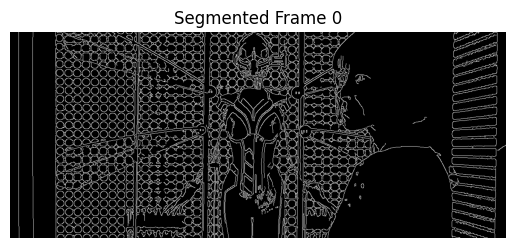

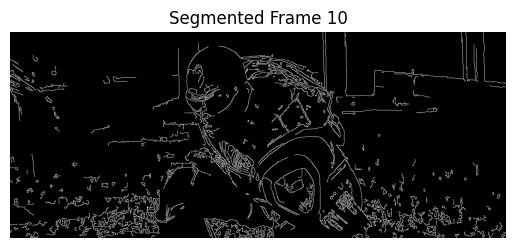

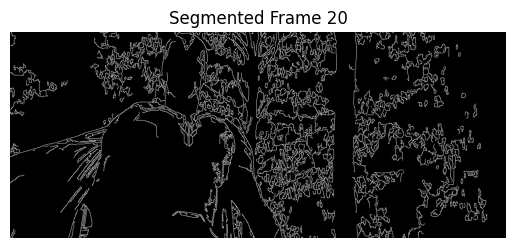

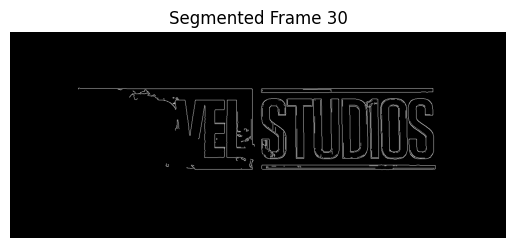

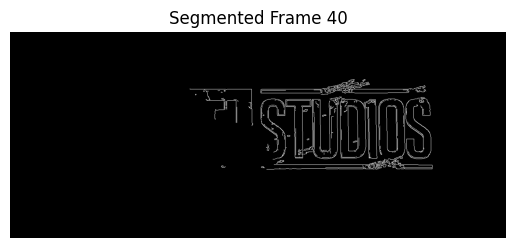

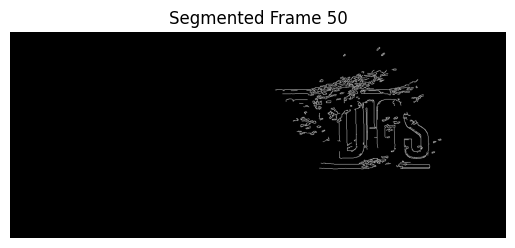

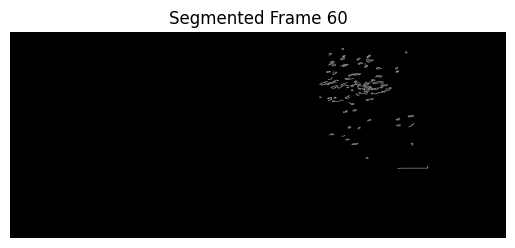

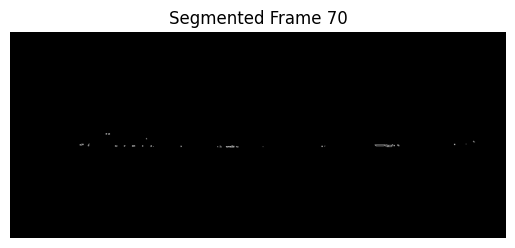

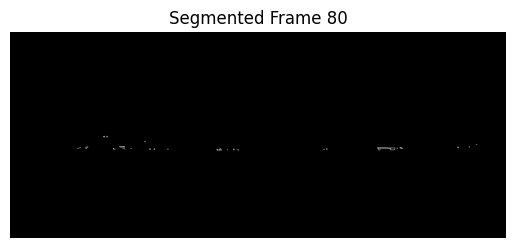

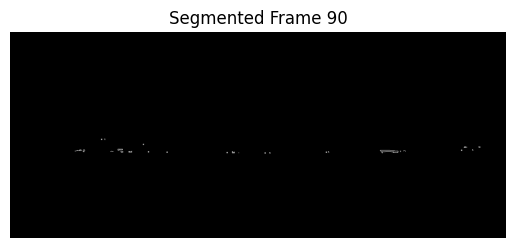

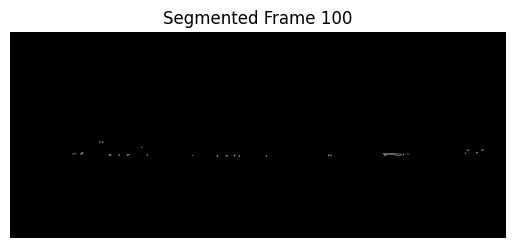

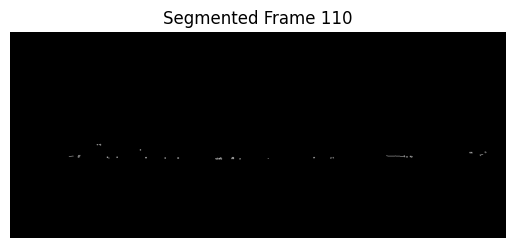

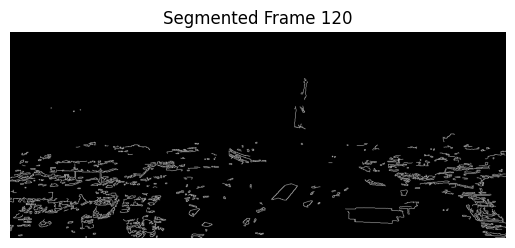

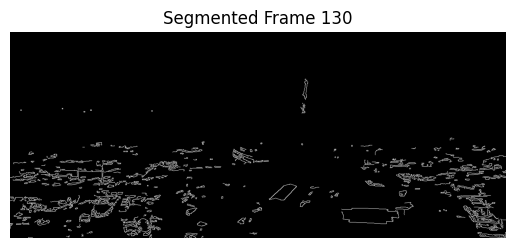

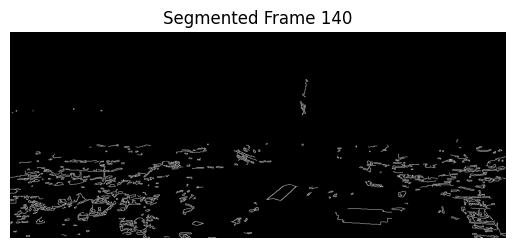

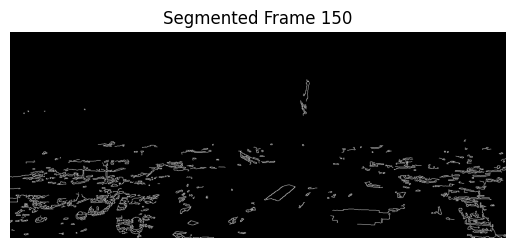

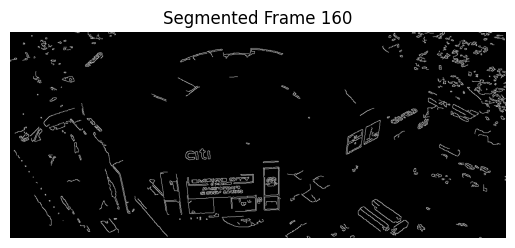

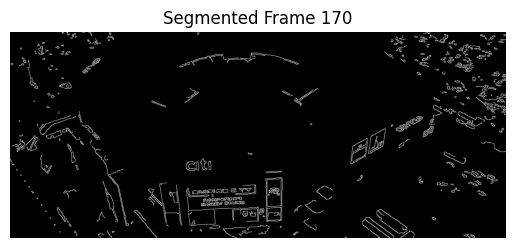

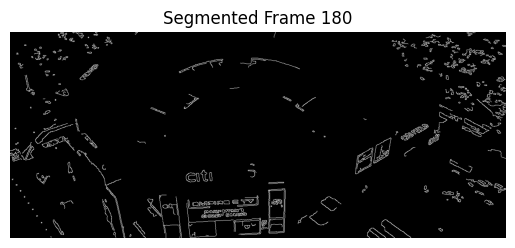

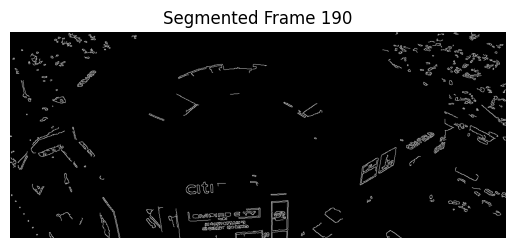

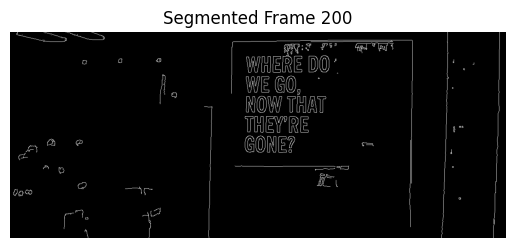

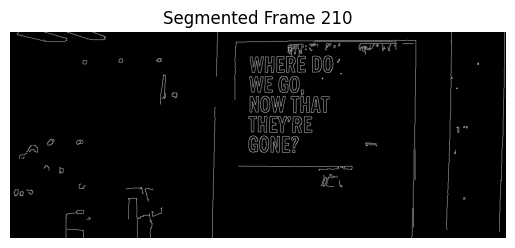

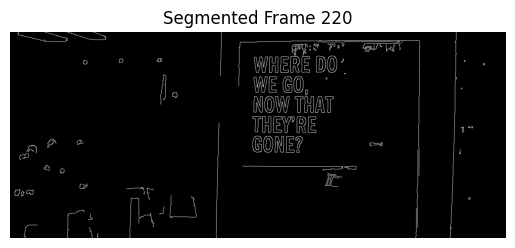

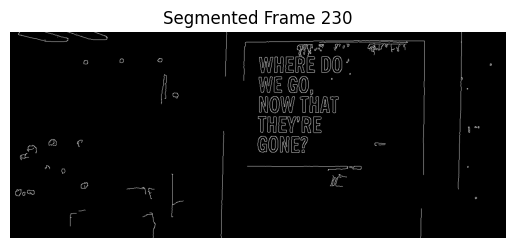

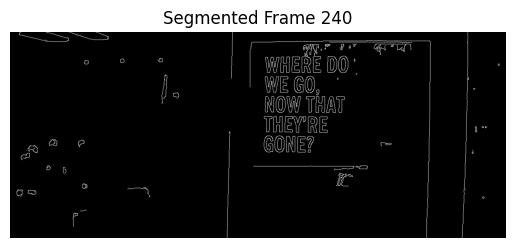

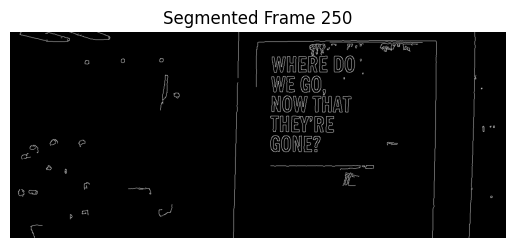

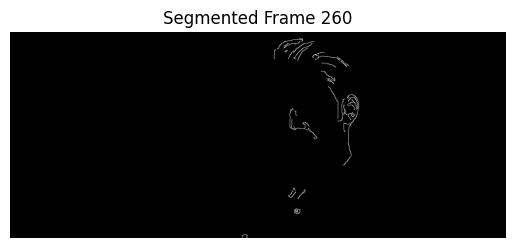

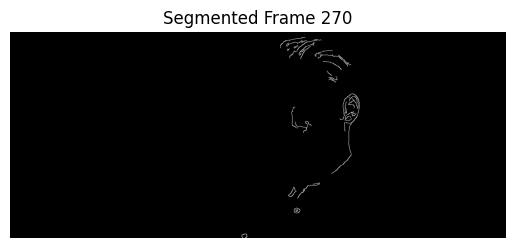

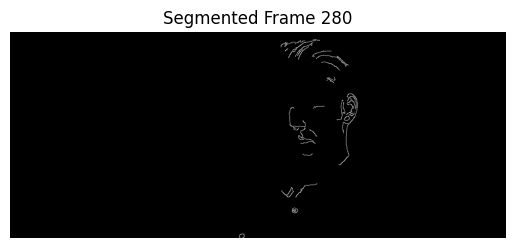

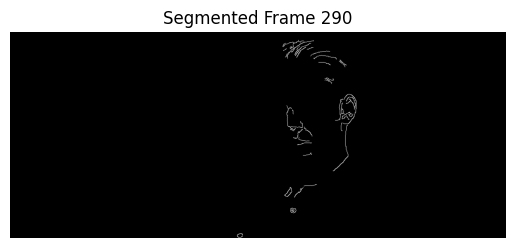

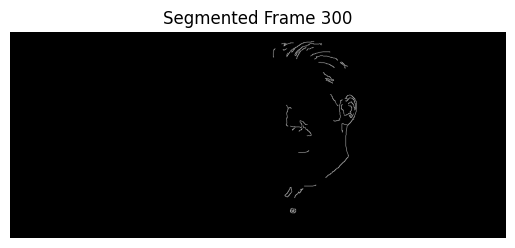

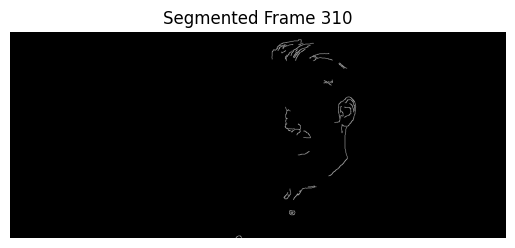

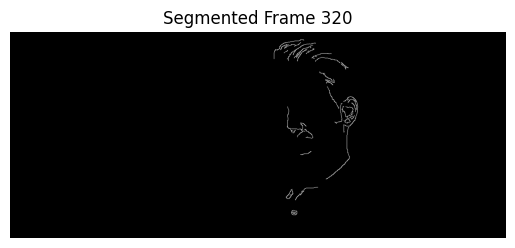

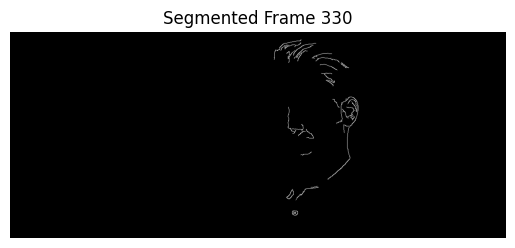

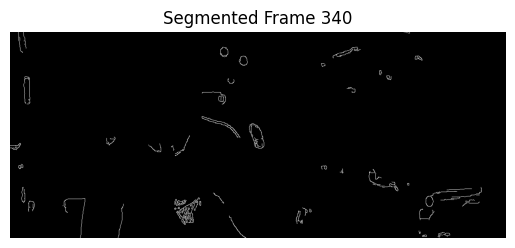

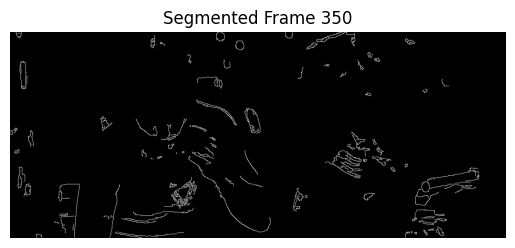

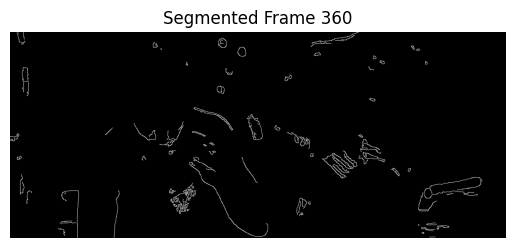

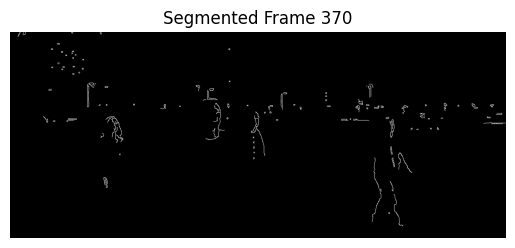

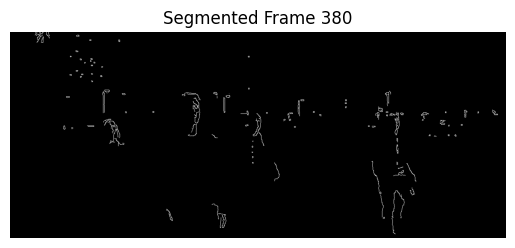

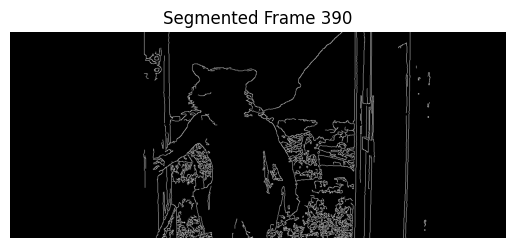

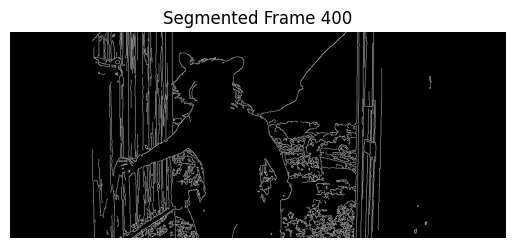

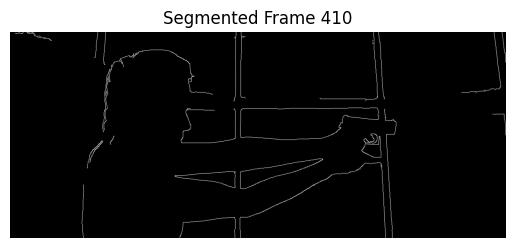

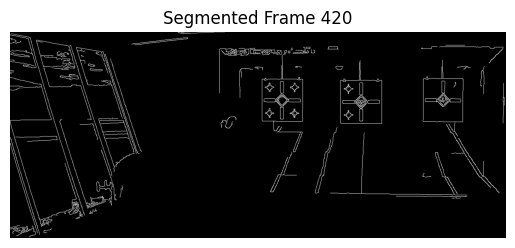

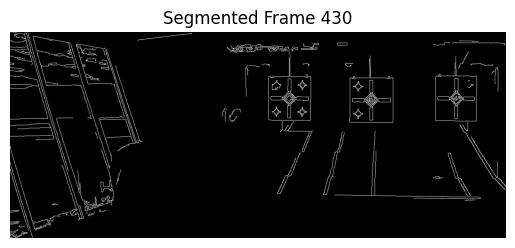

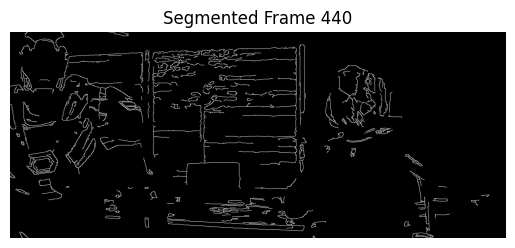

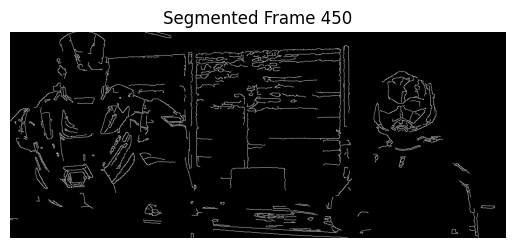

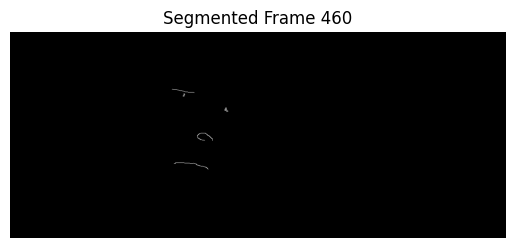

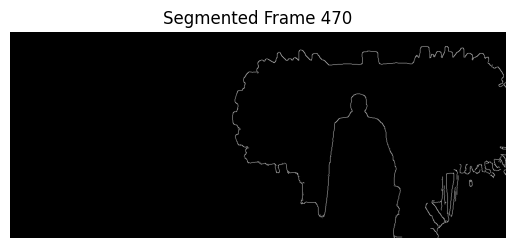

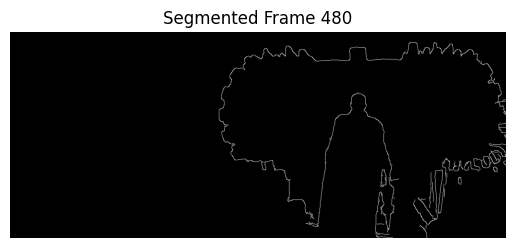

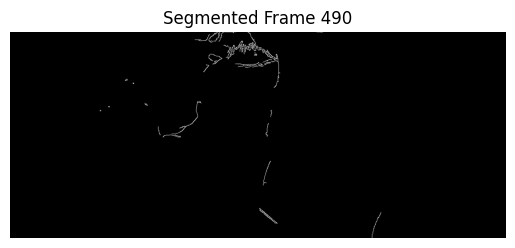

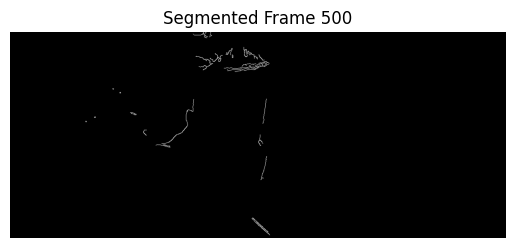

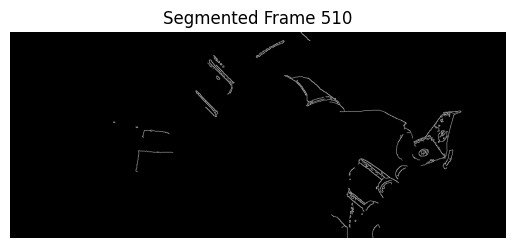

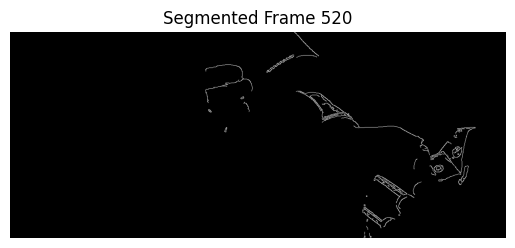

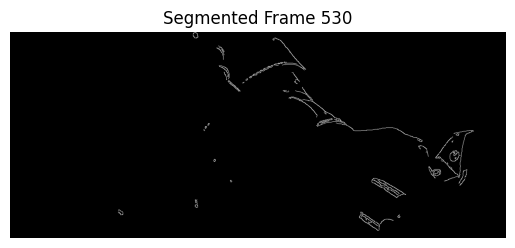

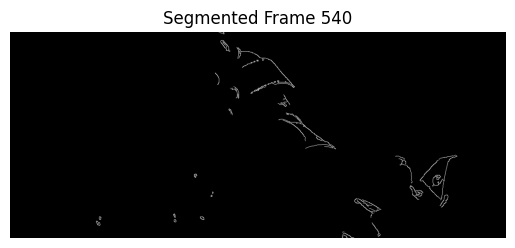

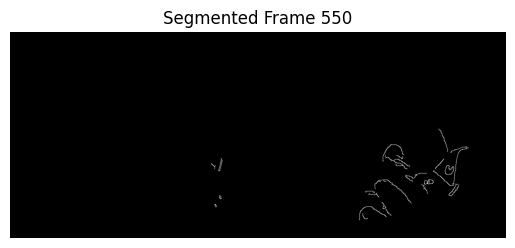

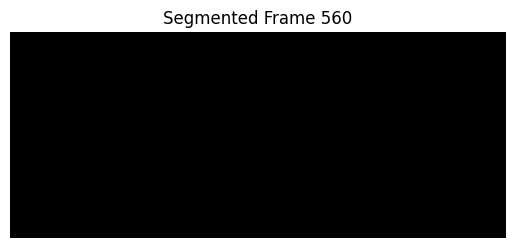

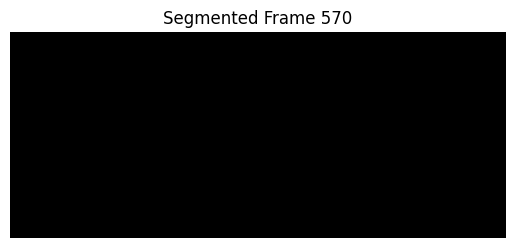

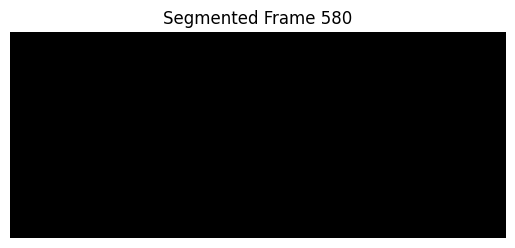

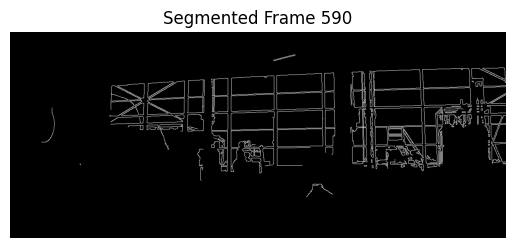

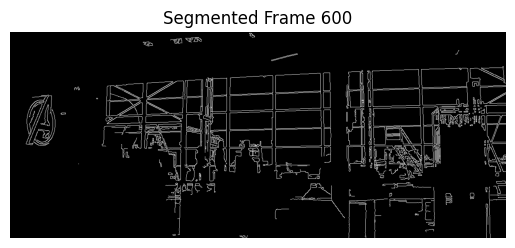

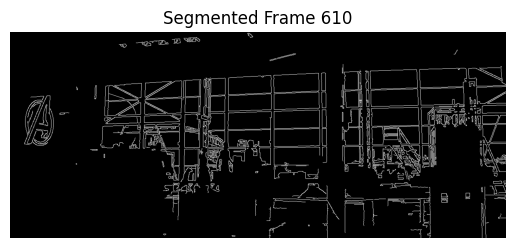

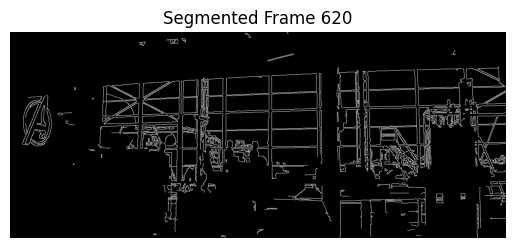

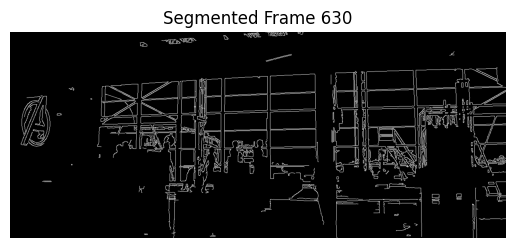

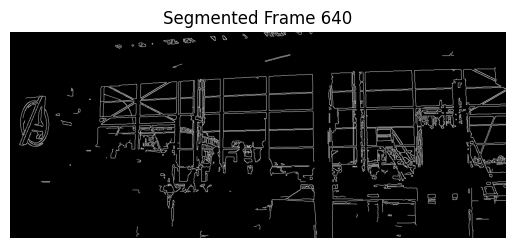

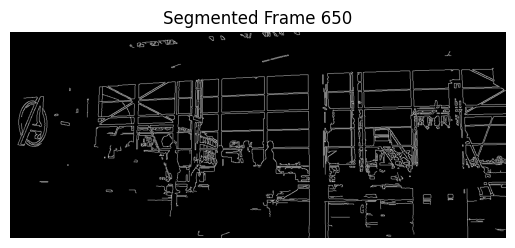

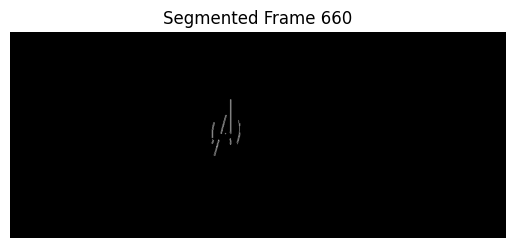

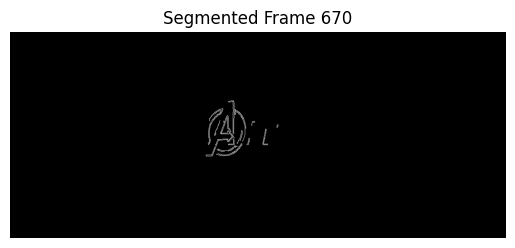

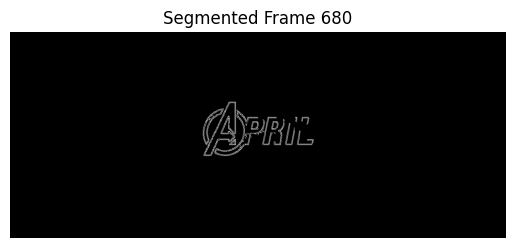

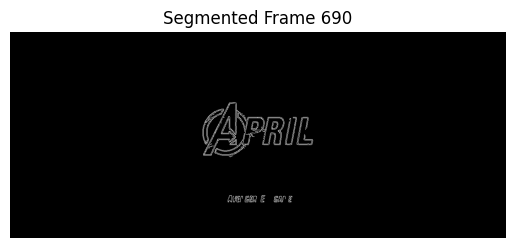

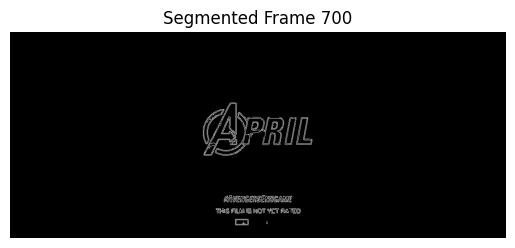

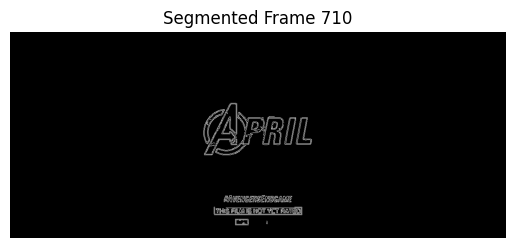

In [42]:
# Display Segmentation Results for Selected Frames
for i in range(0, len(segmented_frames), 10):  # Show every 10th segmented frame
    plt.imshow(segmented_frames[i], cmap='gray')
    plt.title(f'Segmented Frame {i}')
    plt.axis('off')
    plt.show()

Github Link: https://github.com/TanishMahajan28/21BAI1187_MachineVisionLab